<a href="https://colab.research.google.com/github/Ghalia671/MODULE1/blob/master/Kezhan_3_0_Gridsearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
np.random.seed(1)

nsample=50
X=np.concatenate((np.random.normal(0.5,0.05,nsample),
                np.random.normal(0.2,0.05,nsample),
                np.random.normal(0.8,0.05,nsample))).reshape(-1,1)

y=np.concatenate((np.repeat(1,nsample),np.repeat(0,2*nsample)))

In [2]:
import numpy as np
X=np.array([[-1.51], [-1.29], [-1.18], [-0.64],
[-0.53], [-0.09], [0.13], [0.35],
[0.89], [1.11], [1.33], [1.44]])
y=np.array([[0], [0], [0], [0],
[1], [1], [1], [1],
[0], [0], [0], [0]])

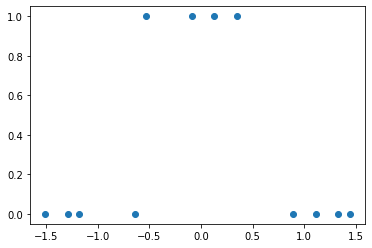

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [4]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=8000)
clf.fit(X, y)
clf.score(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6666666666666666

In [5]:
clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

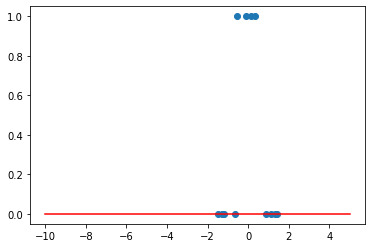

In [6]:
xseq=np.linspace(-10,5,1000).reshape(-1,1)
plt.scatter(X,y)
plt.plot(xseq,clf.predict(xseq),c="red")

In [7]:
from sklearn.metrics import confusion_matrix
confusion_matrix(clf.predict(X),y)

array([[8, 4],
       [0, 0]])

# Tuning d'un paramètre

## Données

In [8]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
import numpy as np

iris = load_iris()
cancer=load_breast_cancer()

X = iris.data
y = iris.target

## Modèle

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

## Hyperparamètres

In [10]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 20,100]}

print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 20, 100]}


## Apprentissage

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid, cv=5,
                          return_train_score=True)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [13]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 20, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

## Résultats

In [14]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [15]:
grid_search.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10}
Best cross-validation score: 0.97


In [17]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


## Visualisation

In [18]:
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)

results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001954,0.001052,0.000479,0.000131,0.001,{'C': 0.001},0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,6,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
1,0.000823,0.000019,0.000321,0.000013,0.01,{'C': 0.01},0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,6,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
2,0.000734,0.000013,0.000322,0.000016,0.1,{'C': 0.1},0.869565,0.826087,0.727273,0.818182,0.863636,0.820949,0.050980,5,0.820225,0.887640,0.788889,0.788889,0.844444,0.826017,0.037222
3,0.000535,0.000007,0.000289,0.000016,1,{'C': 1},1.000000,0.956522,1.000000,0.909091,0.954545,0.964032,0.033918,3,0.966292,0.966292,0.955556,0.977778,0.966667,0.966517,0.007030
4,0.000488,0.000013,0.000273,0.000013,10,{'C': 10},1.000000,0.956522,1.000000,0.954545,0.954545,0.973123,0.021957,1,0.988764,0.977528,0.977778,0.988889,0.988889,0.984370,0.005485
5,0.000572,0.000061,0.000308,0.000034,20,{'C': 20},1.000000,0.913043,1.000000,0.954545,0.954545,0.964427,0.032761,2,0.988764,0.988764,0.977778,0.988889,1.000000,0.988839,0.007028
6,0.000638,0.000105,0.000428,0.000123,100,{'C': 100},1.000000,0.956522,0.954545,0.863636,0.954545,0.945850,0.044624,4,0.988764,0.988764,0.977778,1.000000,1.000000,0.991061,0.008328


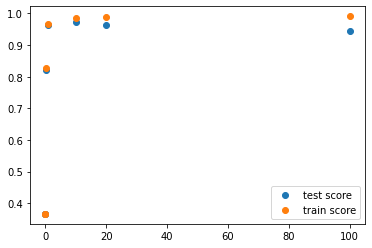

In [19]:
import matplotlib.pyplot as plt

plt.scatter(results["param_C"],results["mean_test_score"],label="test score")
plt.scatter(results["param_C"],results["mean_train_score"],label="train score")
plt.legend()

# Tuning de deux paramètres

## Hyperparamètres

In [20]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


## Apprentissage

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5,
                          return_train_score=True)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

In [23]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

## Résultats

In [24]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [25]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.97


In [26]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


## Visualisation

In [27]:

results = pd.DataFrame(grid_search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001152,0.000196,0.000504,0.000149,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
1,0.000793,0.000060,0.000321,0.000010,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
2,0.000826,0.000100,0.000342,0.000026,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
3,0.000761,0.000007,0.000325,0.000008,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
4,0.000763,0.000022,0.000330,0.000009,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581


In [28]:
pvt = pd.pivot_table(pd.DataFrame(grid_search.cv_results_),
    values='mean_test_score', index='param_gamma', columns='param_C')

pvt

param_C,0.001,0.010,0.100,1.000,10.000,100.000
param_gamma,,,,,,
0.001,0.366403,0.366403,0.366403,0.696443,0.937945,0.964032
0.010,0.366403,0.366403,0.696443,0.937945,0.964032,0.964427
0.100,0.366403,0.366403,0.901581,0.964032,0.973123,0.954941
1.000,0.366403,0.366403,0.955336,0.946640,0.946245,0.946245
10.000,0.366403,0.366403,0.366403,0.928458,0.911067,0.911067
100.000,0.366403,0.366403,0.366403,0.501581,0.581423,0.581423


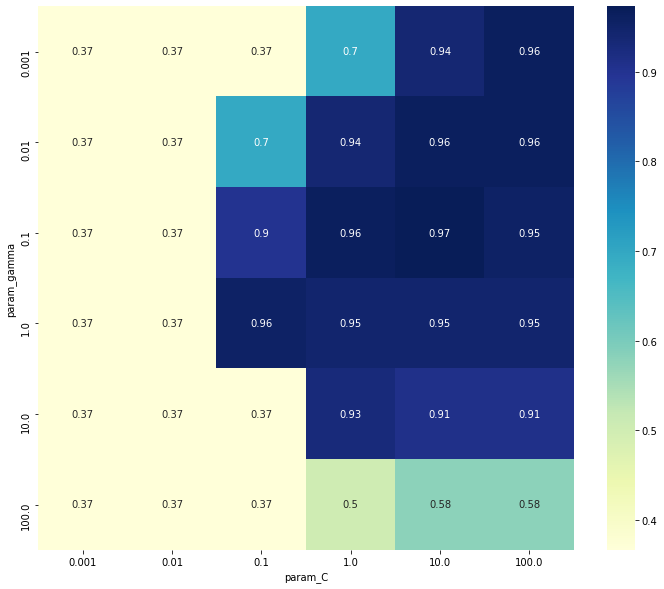

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,10))
ax = sns.heatmap(pvt,annot=True, cmap="YlGnBu")

# Trois paramètres

In [30]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [31]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5,
                          return_train_score=True)
grid_search.fit(X_train, y_train)


print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.97


In [32]:
results = pd.DataFrame(grid_search.cv_results_)
